# ADS Homework #1
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 1, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - Probability (30 points)

Let's look at some basic probability simulations and how Python can be used as a tool to generate and evaluate probabilistic events.

**1.1)** Use the *numpy* or *random* library to generate a pair of six-sided dice. Simulate 100,000 roles of the dice, adding the two numbers together. Plot a histogram of the counts for each sum recorded. Caption the figure with any observations you may have (be sure to include a title); if you are unsure, make an educated gauss... er, I mean guess. (10 points)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random #I cannot directly import random but to import numpy first
from collections import Counter
random.seed(42)
%matplotlib inline

array([ 9, 10,  5, ...,  8,  5, 10])

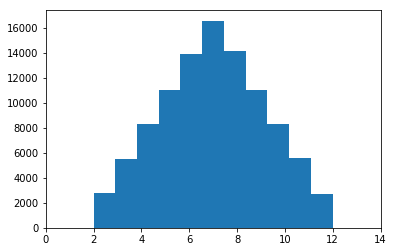

In [3]:
n = 100000
die1 = random.randint(1, 7, size=n)
die2 = random.randint(1, 7, size=n)
diesum = die1 + die2
plt.hist(diesum, bins=11)
plt.xlim(0,14)
diesum

Caption:Figure1:this is the histogram to the counts of 2 dice.

Second method to solve the first question:

Counter({7: 16569, 8: 14172, 6: 13924, 5: 11041, 9: 11032, 4: 8328, 10: 8299, 11: 5602, 3: 5501, 2: 2798, 12: 2734})


Text(0.5,1,'Two 6-sides dice sum of counts recorded')

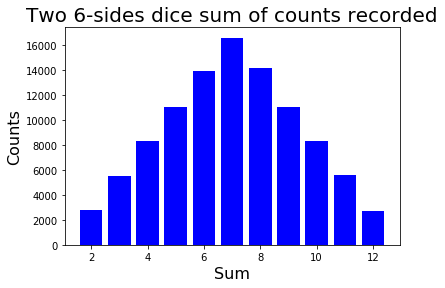

In [3]:
random.seed(42)
n = 100000
die1 = random.randint(1, 7, size=n)
die2 = random.randint(1, 7, size=n)
diesum = die1 + die2
recounted = Counter(diesum)
print(recounted)


for i in range(2,13):
    plt.bar(i,recounted[i], color='Blue')
plt.xlabel('Sum', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.title(r'Two 6-sides dice sum of counts recorded', fontsize = 20)    


Figure1(2):second way to plot the counts use bars. 

**1.2)** Using *x* and *y* provided below, plot the data and answer the following questions. (20 points total)

In [4]:
x = range(20)
y = [14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
     55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

(a) Calculate corr(x,y) and provide a brief description of what this tells us. (5 points)

In [5]:
np.corrcoef(x,y)

array([[ 1.        ,  0.95630101],
       [ 0.95630101,  1.        ]])

#
This mean the correlation coefficient between list x and list y is 0.95630101, which means the two variables have strong positive correlation.

(b) Generate a scatter plot of the data. Be sure to include a title and caption. (5 points)

Text(0.5,1,'Scatterplot of x y')

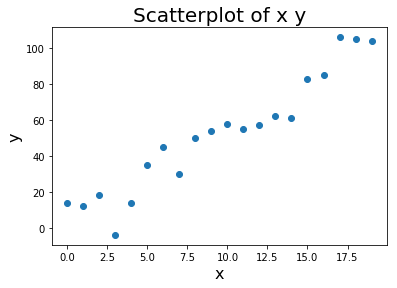

In [6]:
ax = plt.scatter(x,y)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.title(r'Scatterplot of x y', fontsize = 20)

Caption:Figure2 is the scatter plot the list x and y.

(c) There's obviously some linear correlation going on here... using the *statsmodels* or *sklearn* libraries, fit a line to the data and plot this on the scatter plot generated in *b*. In the caption, be sure to discuss the R-squared value for the fit. (10 points)

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import pandas as pd

In [8]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
data = pd.merge(pd.DataFrame(x),pd.DataFrame(y), left_index=True,right_index=True)
data.rename(columns={'0_x':'x','0_y':'y'},inplace=True)
data.head()

,x,y
0,1,14.0
1,2,12.0
2,3,18.0
3,4,-4.0
4,5,14.0


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Fri, 28 Sep 2018   Prob (F-statistic):           4.71e-11
Time:                        10:36:57   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3316      4.566     -0.730      0.4

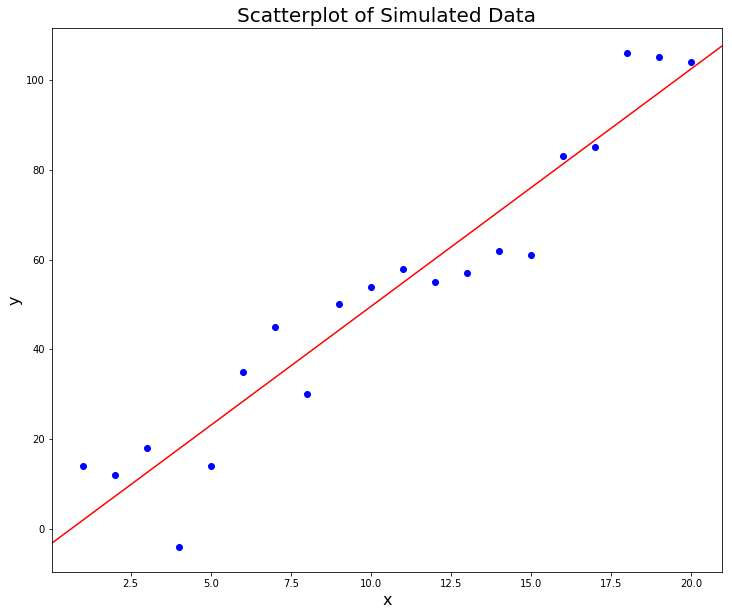

In [9]:
plt.figure(figsize=(12, 10))
figure, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x,y, c='b')
mod = smf.ols(formula='y ~ x ', data = data).fit()
abline_plot(model_results=mod, ax = ax,color='red')

plt.xlabel(r'x', fontsize = 16)
plt.ylabel(r'y', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize=20)
print(mod.summary())

Caption:Adjust R square is 0.91, which means the linear model (red line) can explain 91% of the sample datapoint. The model is suitable and x have strong positive correlation with y.

### Problem 2 (35 Points)

You are staring out the window from the 13th story of CUSP, looking on as people bustle about Jay Street; some head to the subway, others wait in line for street food, and yet others seem to wander around aimlessly. You don't know or care about what they are doing or where they are going. The one thing that you do know for certain is that none of them were born on a leap-day (February 29th). You also have recently found a dataset on subway ridership in NYC in which people have self-reported their birthdays. 

Because you are a data scientist, you begin to wonder... 'What is the likelihood that any one of them shares my birthday?' Knowing that, due to a variety of reasons, real-life births are not evenly distributed throughout the year, you decide to dig into the dataset to see if you can uncover trends in what time of year people are born. The dataset, unfortunately is a little messy, due to a poor user-interface, but with a bit of cleaning, should be fine to use. Let's take a closer look at the 'births.csv' dataset.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

birthdays = pd.read_csv('birthdays.csv') # make sure file is in same folder as notebook
birthdays.index = birthdays.index + 1   
birthdays.index.name = 'day_of_year'

birthdays.tail()

,month,day,births,subway_ridership
day_of_year,,,,
368,12,27,194006,133.240120
369,12,28,201768,110.172457
370,12,29,204806,27.509756
371,12,30,206894,36.174987
372,12,31,194368,129.920260


* **'day_of_year'** describes the day of the year from January 1. <br>
* **'births'** describes the number of births that users registered for a given date <br>
* **'subway_ridership'** describes the average reported subway ridership (rides/month) for people born on that day.

2.1) First plot the birthday data (ignore subway ridership for now) and see if there are any patterns. If so, what are they? Include a description below your plot describing your observations and possible explainations - these observations can just be hypotheses, and do not have to be correct. (10 points)

Text(0.5,1,'Births in one certain day')

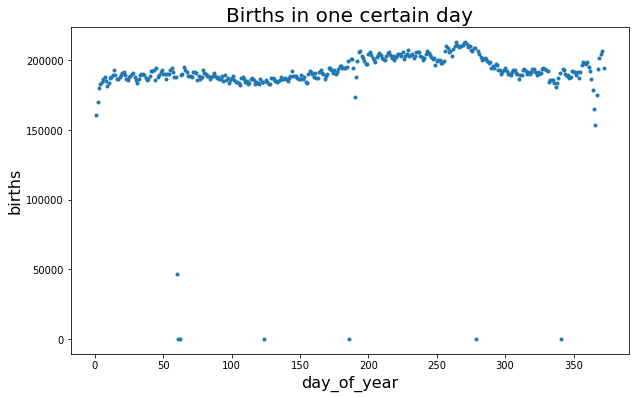

In [11]:
plt.figure(figsize=(10,6))
plt.plot(birthdays.index, birthdays.births, '.')

plt.xlabel('day_of_year',fontsize = '16')
plt.ylabel('births',fontsize = '16')
plt.title("Births in one certain day",fontsize = '20')

Figure3: This shows the births distribution in the whole year. It seems that more poeple birth in Fall. This may be more parents prepare to have a baby during the Winter which has Christmas holiday?

2.2) You should notice an issue in the data that you have plotted. Taking a glance at the raw datapoints should provide the answer. Please make note of what the issue is, and print the first 65 rows of a cleaned-up dataset. (15 points)

Some data in births column have extreme value, which is almost close to 0.

In [12]:
bth = birthdays[birthdays['births'] >= 100000]
bth.head(65)

,month,day,births,subway_ridership
day_of_year,,,,
1,1,1,160369,46.763549
2,1,2,169896,38.745642
3,1,3,180036,42.628351
4,1,4,182854,38.160858
5,1,5,184145,2.195034
6,1,6,186726,16.720587
7,1,7,188277,5.829813
8,1,8,185186,45.891352
9,1,9,181511,14.486921


3.3) Plot the data again, and use the 'sort_values' method to examine high and low points. Do you notice anything about overall trends in births by time of year? Do any specific dates stand out? (10 points)

Text(0.5,1,'Births Distribution')

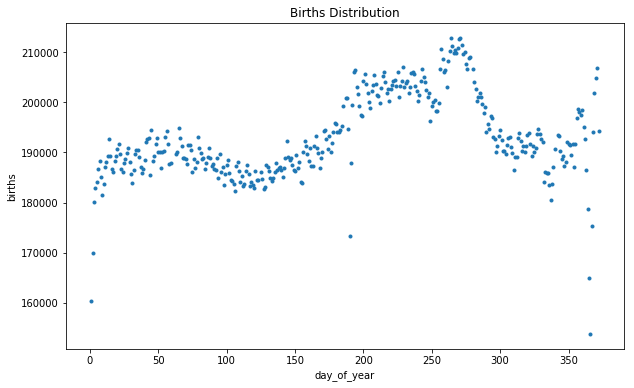

In [13]:
day_of_year = bth.index
births = bth.births
plt.figure(figsize=(10,6))
plt.plot(day_of_year, births,'.')

plt.xlabel('day_of_year')
plt.ylabel('births')
plt.title('Births Distribution')

In [ ]:
bth.sort_values(by=['births'],ascending=True,inplace=True)
bth
#bth.sort_values?

Caption:Day on Sept16 got the maximal biths and day on Dec 25 got the minimum.

### Problem 3 (35 Points)

Now that you've got clean data, you're curious... are people traveling on the subway more likely to have certain birthdays than others? A friend next to you makes the dubious claim that people born later in the year tend to ride the subway more often. You don't believe her, but want to use your data science skills to show that she's wrong (or to discover that you're wrong! Which is notably one of the most exciting experiences in the field of data science). You decide to test her claim armed with your newly-cleaned data and linear regression.

3.1) State the null hypothesis. (5 points)

$H_0$ : $beta_0\hat\beta_1=0$

$H_1$ : $\hat\beta_1\neq0$

3.2) Generate a scatter plot with subway ridership (the dependant variable) on the y-axis and birthday (as day of year) (the independant variable) on the x-axis. Fit a regression line to the data. (15 points)

In [15]:
bth.subway_ridership.describe()

count    365.000000
mean      50.440278
std       32.333221
min        0.065351
25%       24.440671
50%       45.712088
75%       72.102520
max      137.300439
Name: subway_ridership, dtype: float64

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

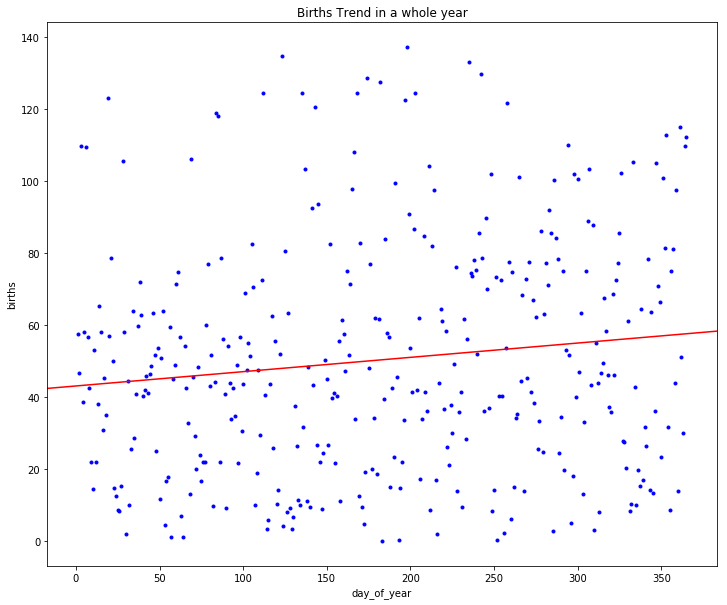

In [22]:
x = range(1,366)
y = bth.subway_ridership
x = np.array(x)
y = np.array(y)
#have to change x,y to array to make the row number keep the same,to get the key of left_index and right_index the same.
data = pd.merge(pd.DataFrame(x),pd.DataFrame(y),left_index=True, right_index=True)
mod = smf.ols(formula='y ~ x', data = data).fit()


plt.figure(figsize=(12,10))
figure, ax = plt.subplots(figsize=(12,10))
ax.plot(x,y,'.',c='b')
abline_plot(model_results= mod, ax = ax, color = 'red' )
plt.xlabel("day_of_year")
plt.ylabel("births")
plt.title("Births Trend in a whole year")
x,y

3.3) Print the summary statistics of your regression and discuss if your results confirm or reject the null hypothesis at a p-value of 0.05. Discuss the possible implications of Type 1 & Type 2 errors and the choice of a 0.05 p-value. (15 points)

In [17]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.203
Date:                Fri, 28 Sep 2018   Prob (F-statistic):             0.0132
Time:                        10:36:58   Log-Likelihood:                -1783.1
No. Observations:                 365   AIC:                             3570.
Df Residuals:                     363   BIC:                             3578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     43.1714      3.368     12.819      0.0

According to the result summary, 0 is outside the 95% confidence interval of t-distribution, which means p-value of slope expectation to be null  hypothesis is lower than 5%, the null hypothesis has been rejected. It's the Error Type 1, the Fact is true and  the H0 has been rejected.